In [ ]:
#! pip install datasets
!pip install ipympl

In [23]:

#Imports
import json

from datasets import load_dataset
import tqdm as tq

In [4]:
#  Download data for the year 1809 at the associated article level (Default)
dataset = load_dataset("dell-research-harvard/AmericanStories",
    "subset_years",
    year_list=["1809", "1810"]
)

Only taking a subset of years. Change name to 'all_years' to use all years in the dataset.
{'1809': 'https://huggingface.co/datasets/dell-research-harvard/AmericanStories/resolve/main/faro_1809.tar.gz', '1810': 'https://huggingface.co/datasets/dell-research-harvard/AmericanStories/resolve/main/faro_1810.tar.gz'}


Generating 1809 split: 0 examples [00:00, ? examples/s]

Loading associated


Generating 1810 split: 0 examples [00:00, ? examples/s]

Loading associated


In [5]:
dataset

DatasetDict({
    1809: Dataset({
        features: ['article_id', 'newspaper_name', 'edition', 'date', 'page', 'headline', 'byline', 'article'],
        num_rows: 422
    })
    1810: Dataset({
        features: ['article_id', 'newspaper_name', 'edition', 'date', 'page', 'headline', 'byline', 'article'],
        num_rows: 982
    })
})

In [10]:
dataset_1809 = dataset['1809'][20]
dataset_1809


{'article_id': '2_1809-01-02_pNone_sn83016082_00332895072_1809010201_0528',
 'newspaper_name': 'Portland gazette and Maine advertiser.',
 'edition': '01',
 'date': '1809-01-02',
 'page': 'pNone',
 'headline': 'HEwBURYroRT, DIG. %.\n60 DICNIFIED [RETIR EMENT =',
 'byline': '',
 'article': 'Ibsy",iy eoa,k uBnb trisgs bi day about\n\n\nSbaH aevo kaesU h bafa MouRNFuL DAY.\n\n\nlie fale my iifs rJes be dofB fske fbe sseans BY\n\n\nubib isve" ..|6\n\n\nfksTfRAr completed twelve months fnce\nthe \'mpoition of the EMsAsco. Never was\nday known in this country which brought\nwith II feelings and anticipations 60 gloomy\nand diitreiling. Il was commemorated in this\ntown by every poilible demoniira,ion of grief\nand mourn,ns-Ae funrfe the bells were rol-\nhsni !; md I\'m DE sbn.. .bjasping, hoiaed half\nrefs, fired The tong of bells and difcharge.\nOf cannon, was repeated at i2, and at clock\nAt 9 O\'Clock, procsiIion of Sailsrs looking\neach of them . "tlosdisj\' imsgs # ds,psir,\'\nwearing Gr

## Tests Notebook American Stories

In [12]:
# let's start with deciding which years we want data for
article_level_desired_years = ["1900", ]

# now let's load our data, we have to specify the huggingface location of our
# data, the fact that we want to have a subset of years, and our desired years
dataset_article_level=load_dataset("dell-research-harvard/AmericanStories",
                                   "subset_years",
                                   year_list=article_level_desired_years
                                   )



Only taking a subset of years. Change name to 'all_years' to use all years in the dataset.
{'1900': 'https://huggingface.co/datasets/dell-research-harvard/AmericanStories/resolve/main/faro_1900.tar.gz'}


Generating 1900 split: 0 examples [00:00, ? examples/s]

Loading associated


In [13]:
# let's inspect the structure
print(dataset_article_level)

DatasetDict({
    1900: Dataset({
        features: ['article_id', 'newspaper_name', 'edition', 'date', 'page', 'headline', 'byline', 'article'],
        num_rows: 1118970
    })
})


In [14]:
dataset_article_level["1900"].features

{'article_id': Value(dtype='string', id=None),
 'newspaper_name': Value(dtype='string', id=None),
 'edition': Value(dtype='string', id=None),
 'date': Value(dtype='string', id=None),
 'page': Value(dtype='string', id=None),
 'headline': Value(dtype='string', id=None),
 'byline': Value(dtype='string', id=None),
 'article': Value(dtype='string', id=None)}

In [17]:
dataset_article_level["1900"][50]

{'article_id': '10_1900-12-13_p2_sn87057928_00340584429_1900121301_0830',
 'newspaper_name': 'Audubon Republican.',
 'edition': '01',
 'date': '1900-12-13',
 'page': 'p2',
 'headline': 'HOLLAND HAS A WELCOME.\n\nCordial Hand Extended Dom Paui q,\n\n\nThe Hague.',
 'byline': '',
 'article': 'Ine hague.\n\n\nThe Hague, Dec. 7.-At the opening\nof the second chamber yesterday,\nPresident Gleichman said:\n\n\npresident Kruger arrives here to.\nday. / take occasion, to propose that\nthe chamber authorize me to well\ncome, in its name, the president to\nour country and offer him an express\nsion of our cordial sympathy"\n\n\nThe proposal was adopted amid\ncheers.\n\n\nWhen Kruger arrived he was greet\ned at the station by the burgomaster\nand councillors and choir of 610\ngirls, who chanted Psalm 70, verses\n6, z and II. The former president\nand suite then repaired to the royal\nwaiting room, where the burgomas-\nter warmly welcomed him in a brief\nspeech.\n\n\nKruger, his suite and receptio

In [19]:
print(dataset_article_level["1900"][50]["article"])

Ine hague.


The Hague, Dec. 7.-At the opening
of the second chamber yesterday,
President Gleichman said:


president Kruger arrives here to.
day. / take occasion, to propose that
the chamber authorize me to well
come, in its name, the president to
our country and offer him an express
sion of our cordial sympathy"


The proposal was adopted amid
cheers.


When Kruger arrived he was greet
ed at the station by the burgomaster
and councillors and choir of 610
girls, who chanted Psalm 70, verses
6, z and II. The former president
and suite then repaired to the royal
waiting room, where the burgomas-
ter warmly welcomed him in a brief
speech.


Kruger, his suite and reception
committee, proceeded in open car
riages to the Hotel Des hides. which
is resplendent with flags and bunt-
ing. The first chamber authorized it's
president to welcome Kruger on be-
half of the house as proof Of its
sympathy.


In [21]:
# we are interesting in spring style

dict_of_articles_containing_spring_style = {}
str_of_interest = "foreign"

# let's loop!
for article_n in range(10):

  # let's grab the article data
  article = dataset_article_level["1900"][article_n]

  # let's grab the article text
  article_text = article["article"]

  # check if we see the text
  if str_of_interest in article_text:
    dict_of_articles_containing_spring_style[article_n] = article["article_id"]
  else:
    pass

# let's see which articles feature this text
print(dict_of_articles_containing_spring_style)

{9: '20_1900-03-23_p6_sn83045462_00280655326_1900032301_0034'}


In [24]:
# in our article we found that the Boer War was the biggest story. We can
# see which articles mention both the Boer War, and Winston Churchill who
# was there as a report. Let's try with all articles this time
str_of_interest_1 = "foreign"
str_of_interest_2 = "migrant"

# we want to find articles back later
dict_of_articles_containing_boer_war_churchill = {}

# proceed like before, looping through all articles. This should take 3 to 4 min
for article_n in tq.tqdm(range(1118970)):

  # let's grab the article data
  article = dataset_article_level["1900"][article_n]

  # let's grab the article text. We need to worry about capitalization here
  article_text = article["article"].lower()

  # we now test for both strings being present
  if (
      str_of_interest_1 in article_text
      and
      str_of_interest_2 in article_text
  ):
    dict_of_articles_containing_boer_war_churchill[article_n] = (
        article["article_id"]
    )
  else:
    pass



100%|██████████| 1118970/1118970 [01:47<00:00, 10447.36it/s]


In [25]:
# let's see how many articles we got
print(len(dict_of_articles_containing_boer_war_churchill))

# let's print the results
print(dict_of_articles_containing_boer_war_churchill)


154
{6833: '23_1900-01-12_p1_sn84024441_00211102810_1900011201_0083', 7774: '15_1900-11-10_p3_sn90051267_00383340925_1900111001_0281', 11345: '10_1900-05-31_p3_sn84002889_00513681045_1900053101_0510', 14020: '9_1900-12-08_pNone_sn82014248_00514156074_1900120801_0511', 21565: '4_1900-01-24_p4_sn84024441_100492003_1900012401_0169', 22888: '4_1900-07-14_p2_sn82014248_00514156062_1900071401_0098', 50090: '17_1900-04-27_p6_sn83030214_00175040857_1900042701_0515', 52030: '5_1900-04-29_p14_sn83030214_00175040857_1900042901_0553', 53110: '10_1900-12-05_p4_sn89051168_00393343114_1900120501_0963', 57684: '8_1900-11-08_p4_sn83016758_00280767876_1900110801_0368', 66523: '11_1900-05-22_p3_sn89051168_00393343102_1900052201_1118', 79077: '9_1900-07-19_p3_sn90051548_00340586207_1900071901_0625', 86239: '1_1900-11-06_p4_sn89051168_00393343114_1900110601_0771', 92801: '9_1900-07-15_p21_sn83030214_00175040894_1900071501_0292', 93101: '46_1900-08-18_p16_sn83030214_00175040900_1900081801_0313', 98743: '13_

In [26]:
# let's inspect the first one
dataset_article_level["1900"][6833]

{'article_id': '23_1900-01-12_p1_sn84024441_00211102810_1900011201_0083',
 'newspaper_name': 'The evening times.',
 'edition': '01',
 'date': '1900-01-12',
 'page': 'p1',
 'headline': 'THE COMMERCE OF China\n\nAn Official Report Showing the lm-\n\n\nports and Exports.\n\nThe Condition of External Trade nm\n\n\nIndex to the National Resources.\npendifures by Foreign Vessels for\n\n\nSupplies - Comparative Statistics.',
 'byline': '',
 'article': 'The latest official report upon the for\n| eign commerce of China, showing imports\nand exports by countries, and articles, and\nthe growth of commerce during term of\nyears, which has been received by the\nTreasury Bureau of Statistics. presents\n| much information especially interesting to\n| the public at the present moment.\n1t shows that the imports into China,\nwhich in 1868 were 64,9i3,00O haikwan\n| taels. in 1878. 73.1SS. 900. and in 1888, 126,-\n$4,000 taels. were in 1898, 2G9, $40 900\n| haikwan taels: while the exports from\nChina. 

In [27]:
print(dataset_article_level["1900"][6833]["article"])

The latest official report upon the for
| eign commerce of China, showing imports
and exports by countries, and articles, and
the growth of commerce during term of
years, which has been received by the
Treasury Bureau of Statistics. presents
| much information especially interesting to
| the public at the present moment.
1t shows that the imports into China,
which in 1868 were 64,9i3,00O haikwan
| taels. in 1878. 73.1SS. 900. and in 1888, 126,-
$4,000 taels. were in 1898, 2G9, $40 900
| haikwan taels: while the exports from
China. which In 1868 were 81. .S26 900 haik-
| wan taels, in 1873. 67.172 900, and in 1888.


92, 4O1 900, were in 1898. 159. .O37 900 haikwan
| taes. The imports from the United States.
| which In 1868 were ZAP. 900 haikwan taels,
| had grown to 2.253.00 In 1878, 3.146,0t0
in 1883. and 17,163.312 In 1898, while the
exports to the United States which in
1858 were 6.S91 900 hakwan taels. were


in 1878. G.576. 900. in 1888. S.963, 900, and in
1898. 11.gST.000 haikwan

In [28]:


import pandas as pd
# It is possible to visualze the frequency of appearance over time

# let's initialize a list of our dates
list_of_dates = []

# let's loop over our article indices
for article_n in dict_of_articles_containing_boer_war_churchill.keys():

  # let's grab the date
  date = dataset_article_level["1900"][article_n]['date']

  # let's add to our list
  list_of_dates.append(date)





<AxesSubplot:xlabel='date'>

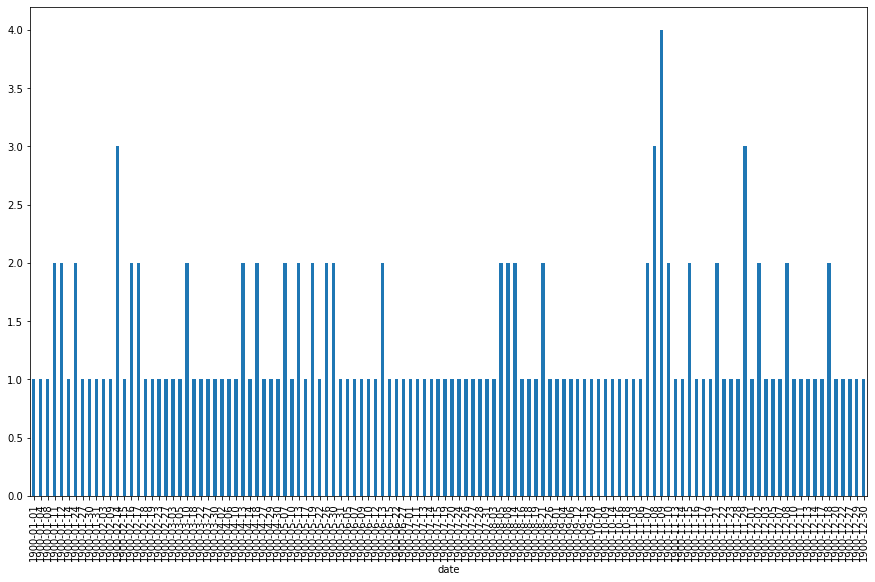

In [29]:


#  now let's plot the frequency by date
df = pd.DataFrame({'date': list_of_dates})
df.groupby('date').size().plot(kind='bar', figsize=(15,9))

